In [1]:
from typing import Annotated

from typing import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [111]:
class MyChat(TypedDict):
    message:Annotated[str,"user's message to LLM"]
    result:Annotated[str,"score given by LLM for generated story"]
    llm1:Annotated[str,"LLM used to generate the response"]
    llm2:Annotated[str,"LLM used to generate the result"]
    llm3:Annotated[str,"LLM used to generate the final result"]
    response:Annotated[str,"final response from LLM"]

In [123]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [124]:
def topic(State: MyChat) -> MyChat:
    return {"message": State["message"]}
    

# def evaluator(State: MyChat) -> MyChat:
#     """
#     Evaluates the generated story.
#     """
#     prompt = f"evaluate the story: {State['response']} in scale of 1 to 10 and return in form of digits only no addiitonal text"
#     result = llm.invoke(prompt)
#     # Here you can implement your evaluation logic
#     # For now, we will just return the state unchanged
#     return {"result": result.content}

def llm1(State: MyChat) -> MyChat:
    prompt= f"write a story about {State['message']}, in 50 words and make sure you maintain an funny tone"
    llm1 = llm.invoke(prompt)
    return {"llm1": llm1.content}

def llm2(State: MyChat) -> MyChat:
    prompt= f"write a story about {State['message']}, in 50 words and make sure you present story in intuitive way"
    llm2 = llm.invoke(prompt)
    return {"llm2": llm2.content}

def llm3(State: MyChat) -> MyChat:
    prompt= f"write a story about {State['message']}, in 50 words and make sure you present story which is liked by kids"
    llm3 = llm.invoke(prompt) 
    return {"llm3": llm3.content}

def judge(State: MyChat) -> MyChat:
    prompt=f"here these are 3 stories generated by 3 different LLMs, {State['llm1']}/n, {State['llm2']}/n, {State['llm3']}/n, now you have to judge which one is the best if 1st story is best then return 1st story is best and also cite the reason why it is best"
    result = llm.invoke(prompt)
    return {"result": result.content}
    

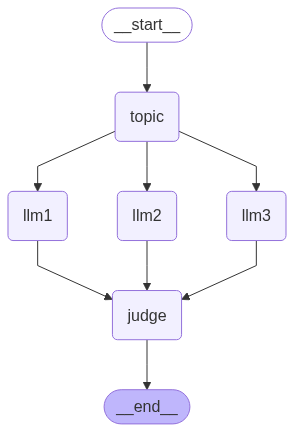

In [125]:
graph=StateGraph(MyChat)

graph.add_node("topic",topic)
graph.add_node("llm1",llm1)
graph.add_node("llm2",llm2)
graph.add_node("llm3",llm3)
graph.add_node("judge",judge)

graph.add_edge(START, "topic")
graph.add_edge("topic", "llm1")
graph.add_edge("topic", "llm2")
graph.add_edge("topic", "llm3")
graph.add_edge("llm1", "judge")
graph.add_edge("llm2", "judge")
graph.add_edge("llm3", "judge")
graph.add_edge("judge", END)

workflow = graph.compile()

workflow



In [126]:
initial_state={"message": "a lion"}

workflow.invoke(initial_state)


{'message': 'a lion',
 'result': 'Here\'s the breakdown:\n\n**1st story is best.**\n\n**Reasoning:**\n\nThe first story is the best because it successfully creates a humorous and engaging narrative with a clear, relatable problem and a comical resolution.\n\n*   **Humor:** The contrast between Leo\'s intended mighty roar and his "squeaky meow" and the description of it sounding like he "swallowed a kazoo" is genuinely funny and memorable. The zebras finding it hilarious adds to the comedic effect.\n*   **Character Development (Brief but effective):** It establishes Leo as a character with a specific, albeit embarrassing, flaw. We understand his desire to roar and the social consequence of his inability to do so.\n*   **Storytelling Arc:** It has a simple but complete arc: a problem (weak roar), an attempt to fix it (practicing in a log), and a humorous outcome (still a bad roar, leading to ridicule).\n*   **Originality:** Compared to the other two, it presents a more unique and unexpec